In [ ]:
import pandas as pd
df = pd.read_csv('/content/Adv.csv',index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
x = df[['TV','Radio']]
y = df[['Sales']]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7)

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

model2.fit(xtrain,ytrain)

YtrainPred = model2.predict(xtrain)      #prediction made on training data
YtestPred = model2.predict(xtest)

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae_train = mean_absolute_error(ytrain,YtrainPred)
mae_test = mean_absolute_error(ytest,YtestPred)
print(mae_train)
print(mae_test)

print('*********************************************')

mse_train = mean_squared_error(ytrain,YtrainPred)
mse_test = mean_squared_error(ytest,YtestPred)
print(mse_train)
print(mse_test)

1.291192966349384
1.2542321094218634
*********************************************
2.9847982873549292
2.402881134701596


In [ ]:
print(model2.coef_)
print(model2.intercept_)

[[0.04738648 0.18580672]]
[2.65740569]


**R2 Score**

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_train = r2_score(ytrain,YtrainPred)
r2_test = r2_score(ytest,YtestPred)
print(r2_train)
print(r2_test)

0.8905019215732257
0.9085098752210264


**Non Linearity**

* Feature Interaction
* yh = w0 + w1x1 + w2x2
* yh = w0 + w1x1 + w2x2 + w3x1*x2

In [ ]:
x = df[['TV','Radio']]
x['TVR'] = x.TV * x.Radio

y = df[['Sales']]

<ipython-input-8-ff4c8a3e2545>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['TVR'] = x.TV * x.Radio


In [ ]:
x.head()

,TV,Radio,TVR
1,230.1,37.8,8697.78
2,44.5,39.3,1748.85
3,17.2,45.9,789.48
4,151.5,41.3,6256.95
5,180.8,10.8,1952.64


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7)

from sklearn.linear_model import LinearRegression
model3 = LinearRegression()

model3.fit(xtrain,ytrain)

YtrainPred = model3.predict(xtrain)      #prediction made on training data
YtestPred = model3.predict(xtest)

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae_train = mean_absolute_error(ytrain,YtrainPred)
mae_test = mean_absolute_error(ytest,YtestPred)
print(mae_train)
print(mae_test)

print('*********************************************')

mse_train = mean_squared_error(ytrain,YtrainPred)
mse_test = mean_squared_error(ytest,YtestPred)
print(mse_train)
print(mse_test)

print('*********************************************')

r2_train = r2_score(ytrain,YtrainPred)
r2_test = r2_score(ytest,YtestPred)
print(r2_train)
print(r2_test)

0.6406865278093328
0.8115382318120846
*********************************************
0.8378945204355495
1.0502713213228578
*********************************************
0.970610397076345
0.9557371051565444


In [ ]:
print(model3.coef_)
print(model3.intercept_)

[[0.01738548 0.00927729 0.00117664]]
[7.06767226]


* Polynomial Regression

In [ ]:
import numpy as np
x = np.array([[5 , 7.2 , 9 , 6.5 , 8]]).reshape(5,1)           #features
y = np.array([[6.1 , 7.1 , 8.3 , 7.6 , 6.9]]).reshape(5,1)       #label

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree = 3 , include_bias=False)

pol.fit(x)
xpol = pol.transform(x)
xpol

array([[  5.   ,  25.   , 125.   ],
       [  7.2  ,  51.84 , 373.248],
       [  9.   ,  81.   , 729.   ],
       [  6.5  ,  42.25 , 274.625],
       [  8.   ,  64.   , 512.   ]])

In [ ]:
from sklearn.linear_model import LinearRegression
pmodel = LinearRegression()

pmodel.fit(xpol,y)

LinearRegression()

In [ ]:
yh = pmodel.predict(xpol)

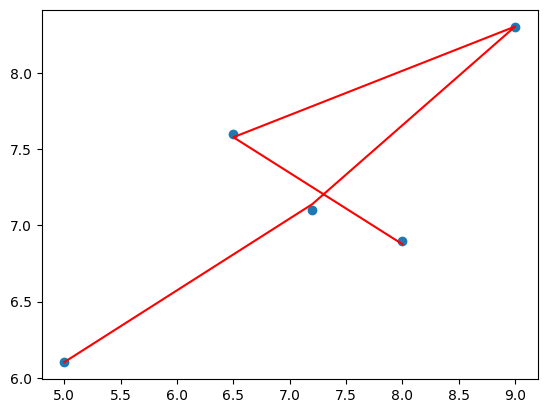

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.plot(x , yh , 'r')

plt.show()

**Polynomial Regression on Advertising Data**

In [ ]:
x = df[['TV','Radio']]
y = df[['Sales']]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(2,include_bias=False)

pol.fit(xtrain)

xtrainpol = pol.transform(xtrain)
xtestpol = pol.transform(xtest)

In [ ]:
print(xtrain.shape)
print(xtrainpol.shape)

(140, 2)
(140, 5)


In [ ]:
from sklearn.linear_model import LinearRegression
model4 = LinearRegression()

model4.fit(xtrainpol,ytrain)

YtrainPred = model4.predict(xtrainpol)      #prediction made on training data
YtestPred = model4.predict(xtestpol)

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae_train = mean_absolute_error(ytrain,YtrainPred)
mae_test = mean_absolute_error(ytest,YtestPred)
print(mae_train)
print(mae_test)

print('*********************************************')

mse_train = mean_squared_error(ytrain,YtrainPred)
mse_test = mean_squared_error(ytest,YtestPred)
print(mse_train)
print(mse_test)

print('*********************************************')

r2_train = r2_score(ytrain,YtrainPred)
r2_test = r2_score(ytest,YtestPred)
print(r2_train)
print(r2_test)

0.37809561167455
0.4534807910532512
*********************************************
0.2610092145091909
0.7165591327386562
*********************************************
0.9901186059498237
0.9749874057440331


**Making Predictions**

In [ ]:
tv = 78.9
radio = 88.7

In [ ]:
#model2 => only 2 features
print(model2.predict([[tv,radio]]))

[[22.87725441]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#model3 => used feature interaction
print(model3.predict([[tv,radio,tv*radio]]))

[[17.49694646]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#model4 => uses polynomial transformation of input features

print(pol.transform([[tv,radio]]))
print(model4.predict(pol.transform([[tv,radio]])))

[[  78.9    88.7  6225.21 6998.43 7867.69]]
[[20.49969416]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
